<a href="https://colab.research.google.com/github/Paulda07/Stock-Market-Price-Prediction/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install pandas_datareader

     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 6.4 MB 64.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# For time stamps
from datetime import datetime

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['JPM', 'BAC', 'WFC', 'MS']

# Set up End and Start times for data grab
tech_list = ['JPM', 'BAC', 'WFC', 'MS']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

NameError: ignored

In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
#company_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-04-26,2896.000000,2897.120117,2778.590088,2787.820068,2787.820068,3876500,AMAZON
2022-04-27,2803.830078,2838.969971,2715.669922,2763.340088,2763.340088,3566800,AMAZON
2022-04-28,2843.560059,2918.750000,2806.000000,2891.929932,2891.929932,5865800,AMAZON
2022-04-29,2596.979980,2615.219971,2432.500000,2485.629883,2485.629883,13616500,AMAZON
2022-05-02,2448.020020,2493.360107,2367.500000,2490.000000,2490.000000,7439400,AMAZON
2022-05-03,2481.070068,2524.409912,2456.500000,2485.070068,2485.070068,3956700,AMAZON
2022-05-04,2472.000000,2520.000000,2383.659912,2518.570068,2518.570068,5537300,AMAZON
2022-05-05,2460.000000,2469.979980,2301.449951,2328.139893,2328.139893,7219600,AMAZON
2022-05-06,2297.000000,2381.010010,2261.629883,2295.449951,2295.449951,6206700,AMAZON


In [ ]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,153.960850,155.723479,152.385691,154.130830,153.613102,8.713939e+07
std,15.457615,15.798791,15.007799,15.402732,15.543669,2.565826e+07
min,123.160004,124.639999,122.250000,122.769997,122.072571,4.100000e+07
25%,144.380005,146.330002,143.630005,145.399994,144.693344,6.902390e+07
50%,151.449997,153.490005,150.160004,151.830002,151.193680,8.246540e+07
75%,167.479996,169.679993,165.500000,166.559998,166.315643,1.000779e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,1.954327e+08


In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-05-10 to 2022-05-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-05-10,126.129387,3190.489990,2341.659912,245.182892
2021-05-11,125.194740,3223.909912,2308.760010,244.240555
2021-05-12,122.072571,3151.939941,2239.080078,237.068970
2021-05-13,124.260071,3161.469971,2261.969971,241.066406
2021-05-14,126.725975,3222.899902,2316.159912,246.145035


In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-05-10,NaN,NaN,NaN,NaN
2021-05-11,-0.007410,0.010475,-0.014050,-0.003843
2021-05-12,-0.024939,-0.022324,-0.030181,-0.029363
2021-05-13,0.017920,0.003024,0.010223,0.016862
2021-05-14,0.019845,0.019431,0.023957,0.021067


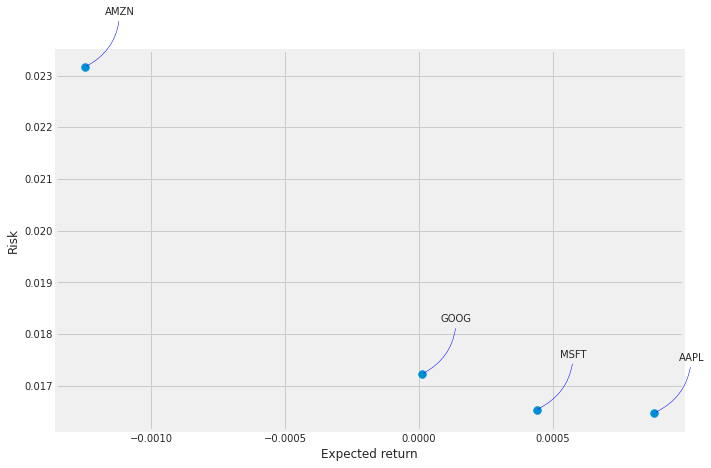

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.557467,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.624952,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765112,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898554,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878094,394024400
...,...,...,...,...,...,...
2022-05-03,158.149994,160.710007,156.320007,159.479996,159.246017,88966500
2022-05-04,159.669998,166.479996,159.259995,166.020004,165.776428,108256500
2022-05-05,163.850006,164.080002,154.949997,156.770004,156.540009,130525300


In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2475

In [ ]:
data

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2022-05-03,159.479996
2022-05-04,166.020004
2022-05-05,156.770004


In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.84981783],
       [0.85285238],
       [0.8217925 ]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 7.4 MB/s 
     |████████████████████████████████| 9.8 MB 50.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:

import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

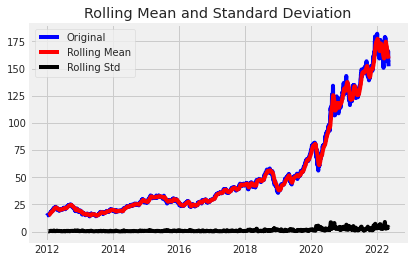

Results of dickey fuller test
Test Statistics                   1.205755
p-value                           0.996025
No. of lags used                 28.000000
Number of observations used    2576.000000
critical value (1%)              -3.432891
critical value (5%)              -2.862663
critical value (10%)             -2.567368
dtype: float64


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(data)

In [ ]:
#The increasing mean and standard deviation may be seen in the graph above, indicating that our series isn’t stationary.

<Figure size 432x288 with 0 Axes>

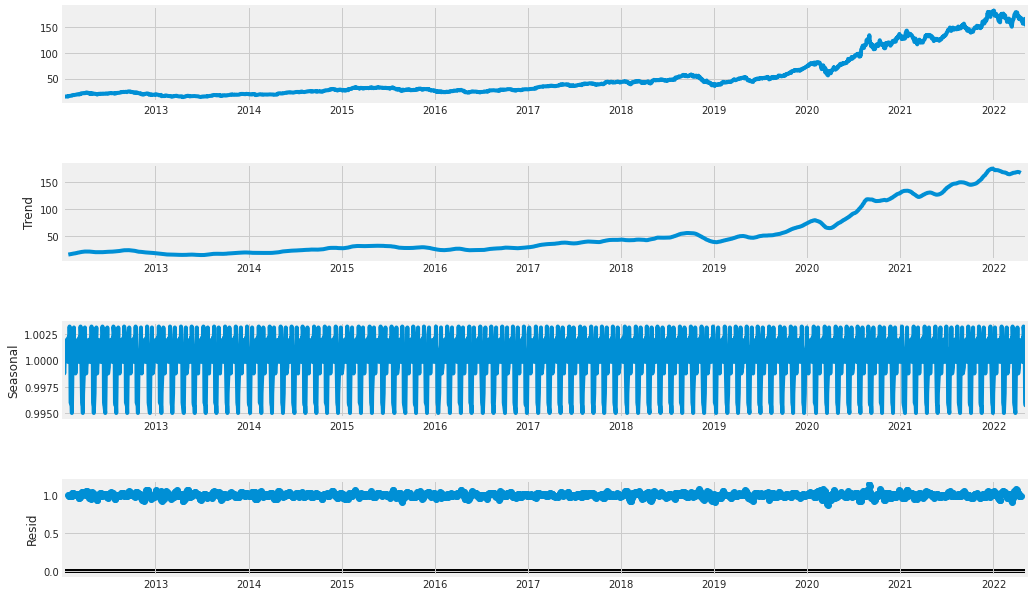

In [ ]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(data, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


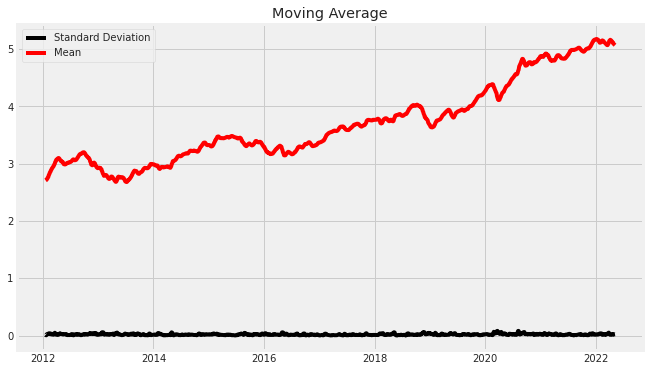

In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(data)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [ ]:
#Now we’ll develop an ARIMA model and train it using the stock’s closing price from the train data. So, let’s visualize the data by dividing it into training and test sets.

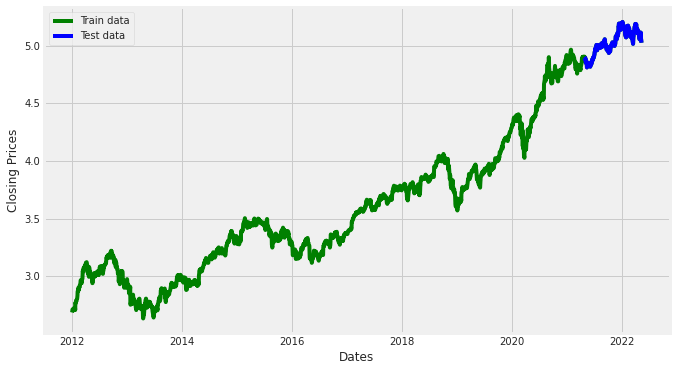

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12112.278, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12120.308, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12120.232, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-12108.096, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-12118.324, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12118.338, Time=2.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-12116.317, Time=1.60 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-12115.279, Time=0.16 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 5.483 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2341
Model:               SARIMAX(1, 1, 0)   Log Likelihood                6063.154
Date:                Mon, 09 May 2022   AIC                         -12120.308
Time:               

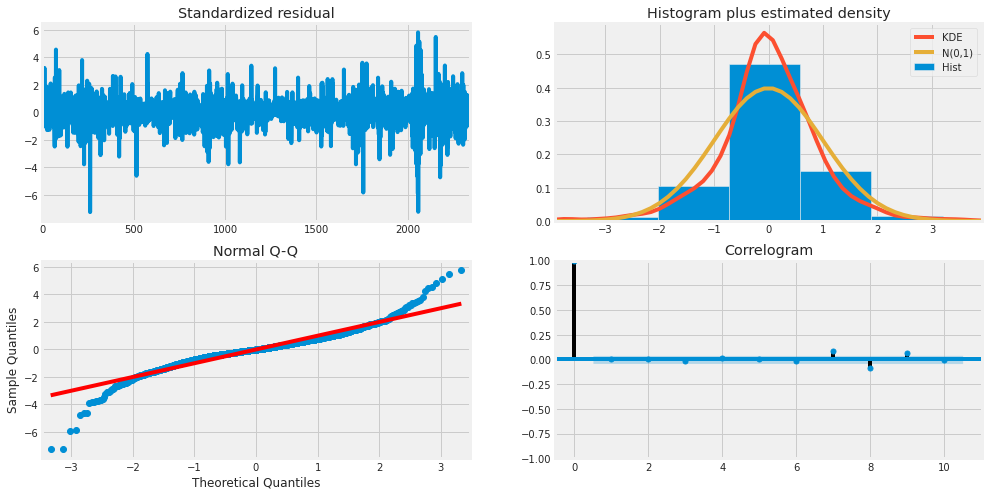

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(1,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

NotImplementedError: ignored

In [ ]:
# Forecast
fc, se, conf = fitted.forecast(261, alpha=0.05)  # 95% conf

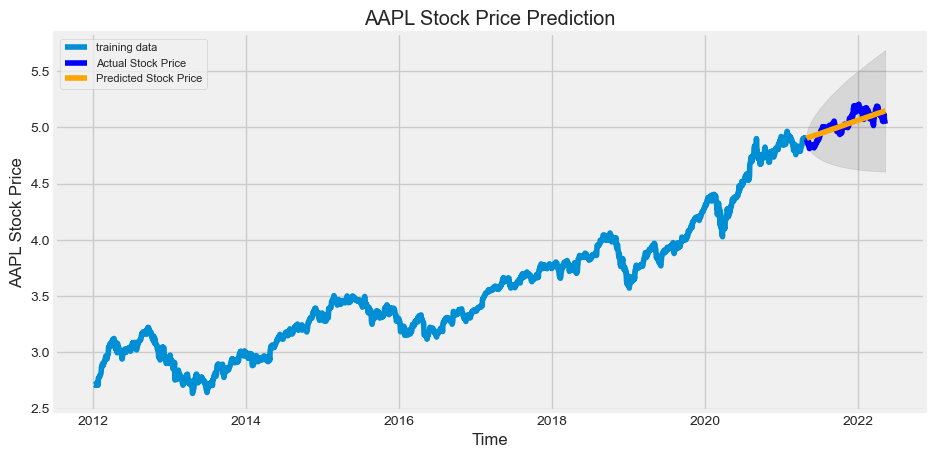

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))


MSE: 0.0033416182592918902
MAE: 0.04722738297373154
RMSE: 0.05780673195478093
